# Individual Planning Report

## Introduction

To answer the question "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?", I have decided to analyze the "players_data" dataset and look at how subsciption status is affected by different factors including gender, age, and experience. A research group in Computer Science at UBC, led by Frank Wood, collected the dataset analyzed in this report. The game that this dataset is about is Minecraft.

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
players_data <- read_csv("players_data.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Description and Exploratory Data Analysis and Visualization

In [16]:
players_data_statistics <- players_data |>
    summary()
players_data_statistics

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

There are 7 different variables in this dataset, with "subscribe" being the response variable. The goal of the dataset is to use all other variables, other than "name" and "hashedEmail", to predict the value of "subscribe". The explanatory variables would include "experience", "played_hours", "gender", and "age".

The "hashedEmail" variable describes the email of each player in hash; hash is not decodable, and this variable is not correlated to the research question.

The "name" variable describes the name of each player, and this variable is not correlated to the research question.

The "subscribe" variable describes whether each player is subscribed to a game-related newsletter.

The "experience" variable describes the experience level of players ranging from "Beginner" to "Veteran" with beginners being new to the game and veterans being the most experienced to the game.

The "played_hours" variable describes the total played hours of each player.

The "gender" variable describes the gender of each player.

The "age" variable describes the age of each player.

Note: played_hours is very skewed to the right as the mean is much greater than the median, age is slightly less skewed to the right

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


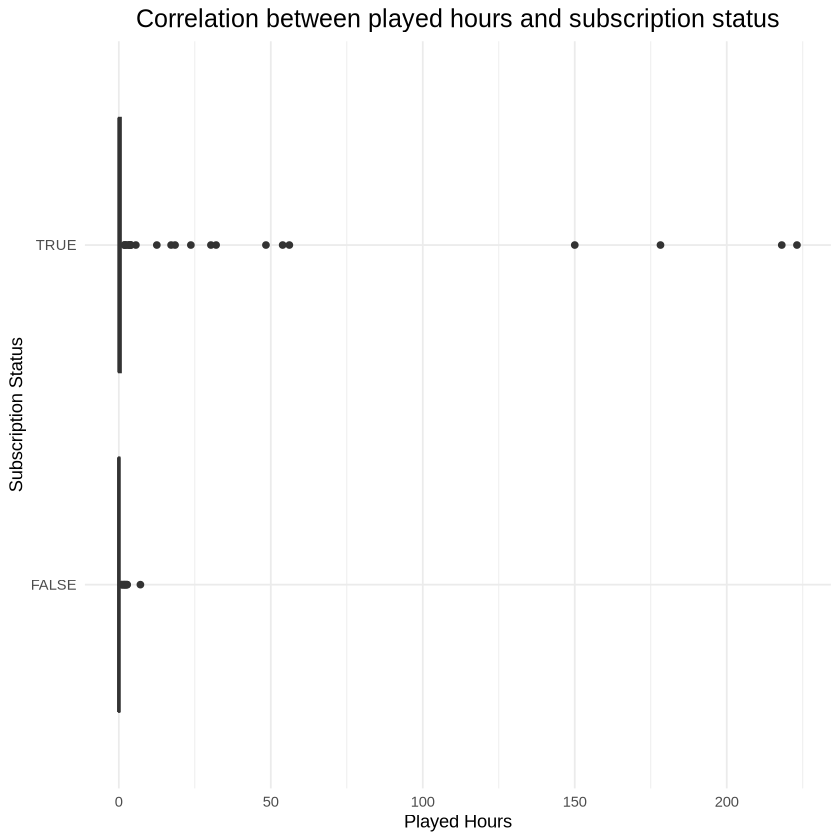

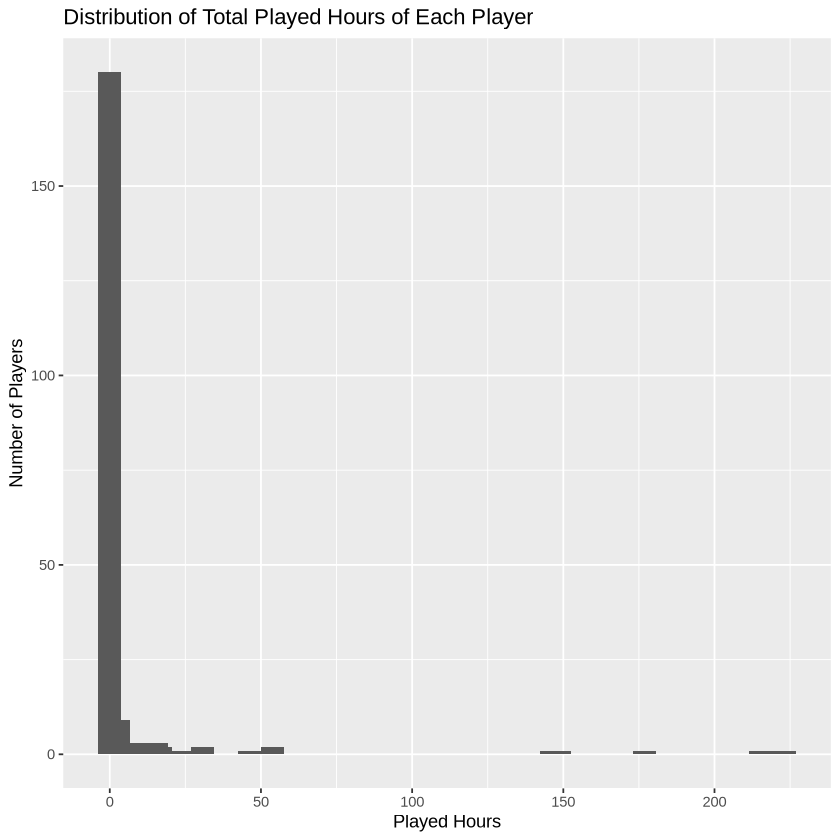

In [48]:
box_plot <- players_data |>
    ggplot(aes(x = played_hours, y = subscribe)) +
    geom_boxplot() +
    labs(title = "Correlation between played hours and subscription status",
    x = "Played Hours",
    y = "Subscription Status") +
    theme_minimal() +
    theme(plot.title = element_text(size = 15, hjust = 0.5))

box_plot

hist_plot <- players_data |>
    ggplot(aes(x = played_hours)) +
    geom_histogram() +
    labs( title = "Distribution of Total Played Hours of Each Player",
    x = "Played Hours", y = "Number of Players") +
    stat_bin(bins = 50)

hist_plot

When we exclude players with 0 play time, we have a similar result:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


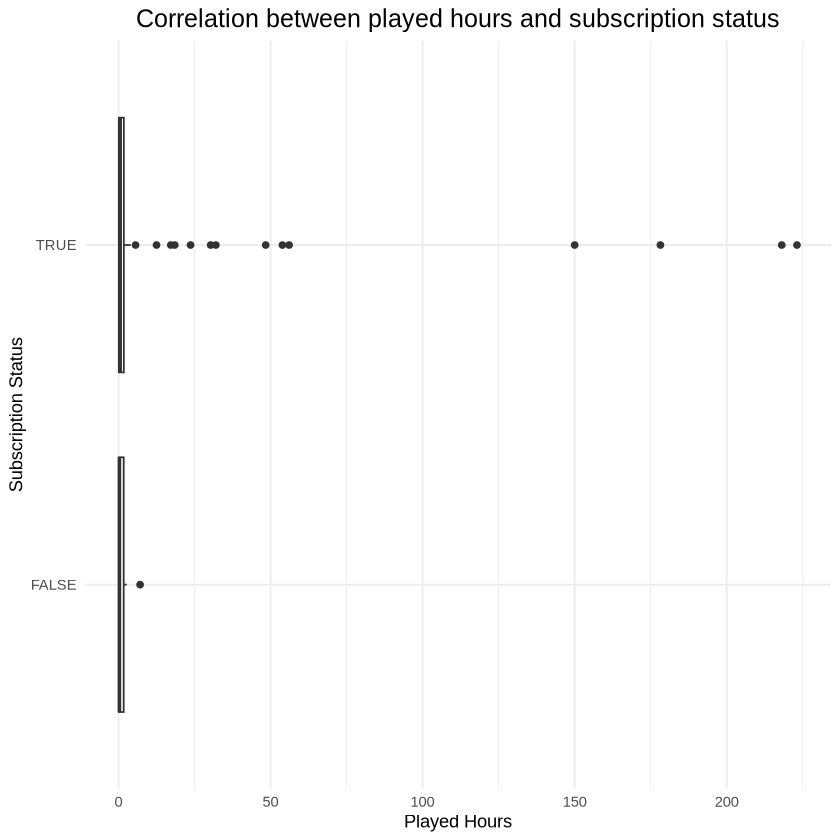

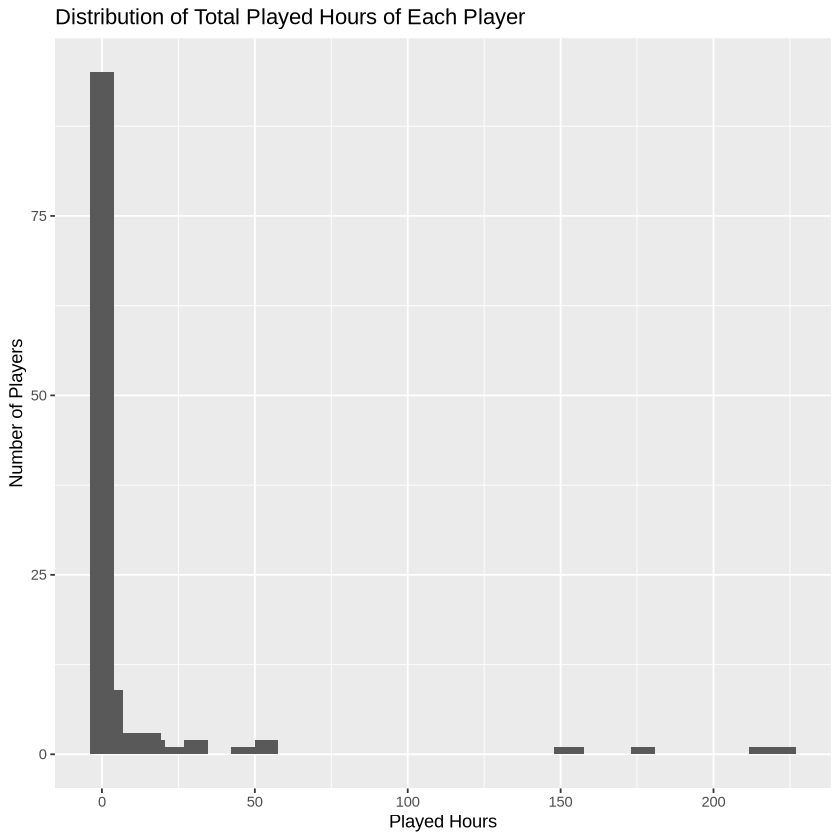

In [50]:
playtime_data <- players_data |>
    filter(played_hours != 0)

box_plot2 <- playtime_data |>
    ggplot(aes(x = played_hours, y = subscribe)) +
    geom_boxplot() +
    labs(title = "Correlation between played hours and subscription status",
    x = "Played Hours",
    y = "Subscription Status") +
    theme_minimal() +
    theme(plot.title = element_text(size = 15, hjust = 0.5))

box_plot2

hist_plot2 <- playtime_data |>
    ggplot(aes(x = played_hours)) +
    geom_histogram() +
    labs( title = "Distribution of Total Played Hours of Each Player",
    x = "Played Hours", y = "Number of Players") +
    stat_bin(bins = 50)

hist_plot2

Played hours is too skewed to be used to predict another variable.

## Questions

Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Individual Question 1: Can the age of a player predict whether or not they will subscribe to a game-related newsletter?

Individual Question 2: Can the gender of a player predict whether or not they will subscribe to a game-related newsletter?

Individual Question 3: Can the experience level of a player predict whether or not they will subscribe to a game-related newsletter?

## Methods and Plan

In order to answer my individual questions, I will be using the regression model on all quantitative variables to check whether or not each exploratory variable is a good predictor of the response variable. For categorial variables such as gender, I will use data visualization to determine if there is a correlation between gender and subscription level.

The reason the regression model works to check for good predictors in numeric variables because I can calculate the R-squared value (which takes into account the standard error/residuals to generate a value describing how much the best-fit line describes the dataset) which will show if the explanatory variable is a good predictor for the response variable. I can also calculate the standard error of the regression model and determine if each numeric variable is a good predictor.

## GitHub Repository

https://github.com/Jessica9521/Individual-Planning-Report/blob/main/Individual%20Planning%20Report.ipynb